<a href="https://colab.research.google.com/github/kaushikrahul1993/Natural-Language-Processing-Domain/blob/main/ML_NLTK_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:f5414556-0e72-4ed6-b242-db8890590159.png)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path=r"/content/drive/MyDrive/Colab Notebooks/RealTime Projects/May 2024- Project by Sundaram/10-Natural Language Processing Domain"

In [ ]:
import os
import sys
os.chdir(path)
sys.path.append(path)

In [ ]:
!ls -a

 israel_palestine_conflict.csv	'ML-Sentiment Analysis.ipynb'   speech.txt


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('israel_palestine_conflict.csv')
df.sample(5)

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
201,2017,JULY,1772.0,23.0,20,5
205,2017,MARCH,189.0,19.0,7,0
145,2012,MARCH,404.0,16.0,28,0
106,2009,JUNE,89.0,NaN,4,0
176,2015,AUGUST,196.0,20.0,9,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    int64  
 1   Month                  249 non-null    object 
 2   Palestinians Injuries  193 non-null    float64
 3   Israelis Injuries      130 non-null    float64
 4   Palestinians Killed    249 non-null    int64  
 5   Israelis Killed        249 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 11.8+ KB


In [ ]:
df["Year"]=df["Year"].astype('object')

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.describe()

,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
count,249.000000,249.000000,249.000000,249.000000
mean,447.690763,20.722892,40.160643,5.120482
std,1466.407720,149.791924,129.148851,11.653323
min,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,4.000000,0.000000
50%,160.000000,2.000000,12.000000,1.000000
75%,302.000000,15.000000,37.000000,5.000000
max,13735.000000,2347.000000,1590.000000,122.000000


In [ ]:
df.describe(include="O")

,Year,Month
count,249,249
unique,22,14
top,2011,DECEMBER
freq,12,21


In [ ]:
num_col=df.select_dtypes(include=np.number).columns
cat_col=df.select_dtypes(include='object').columns

In [ ]:
year_list=df["Year"].unique()

In [ ]:
month_list=df["Month"].unique()

In [ ]:
year_group_df=df.groupby("Year").agg({"Palestinians Injuries":"sum","Israelis Injuries":"sum","Palestinians Killed":"sum","Israelis Killed":"sum"})
year_group_df

,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
Year,,,,
2000,10603.0,0.0,283,41
2001,6386.0,0.0,470,192
2002,4382.0,0.0,1032,419
2003,2992.0,0.0,588,185
2004,4009.0,0.0,786,104
2005,1385.0,493.0,190,51
2006,3199.0,377.0,665,20
2007,15426.0,322.0,385,12
2008,0.0,0.0,886,39


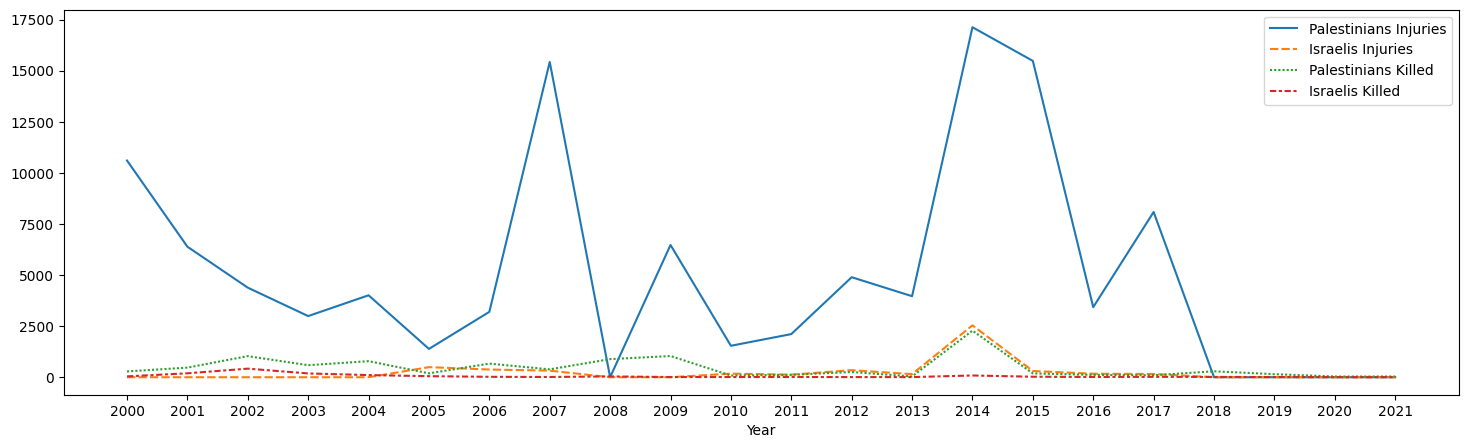

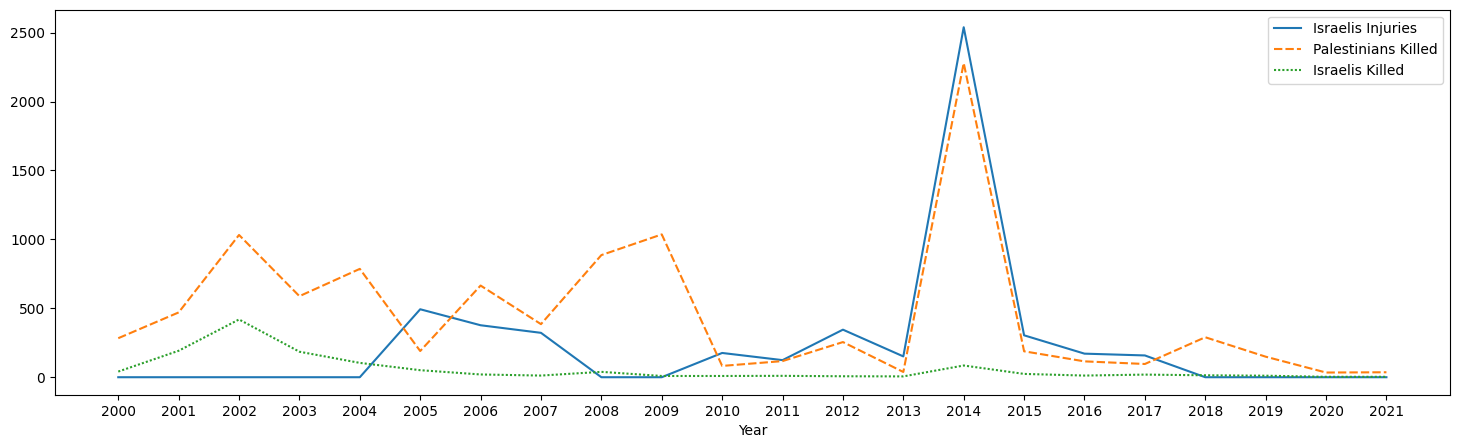

In [ ]:
plt.figure(figsize=(18,5))
sns.lineplot(data=year_group_df[num_col])
plt.xticks(list(year_group_df.index))
plt.figure(figsize=(18,5))
sns.lineplot(data=year_group_df[[col for col in num_col if col !='Palestinians Injuries']])
plt.xticks(list(year_group_df.index))
plt.show()

In [ ]:
month_group_df=df.groupby("Month").agg({"Palestinians Injuries":"sum","Israelis Injuries":"sum","Palestinians Killed":"sum","Israelis Killed":"sum"}).reset_index().sort_values(by="Month")
month_group_df

,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,APRIL,4673.0,226.0,605,84
1,AUGUST,16622.0,2496.0,990,103
2,DECEMBER,23836.0,227.0,945,86
3,FEBRUARY,4508.0,238.0,435,76
4,JANUARY,8705.0,199.0,1362,91
5,JULY,4860.0,219.0,1989,120
6,JUNE,3906.0,169.0,390,137
7,MARCH,5548.0,251.0,719,193
8,MAY,5228.0,203.0,526,89
9,MAY,0.0,0.0,37,5


In [ ]:
month_group_df.loc[len(month_group_df)]=month_group_df.iloc[6]+month_group_df.iloc[10]
month_group_df.loc[len(month_group_df)]=month_group_df.iloc[8]+month_group_df.iloc[9]
month_group_df

,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,APRIL,4673.0,226.0,605,84
1,AUGUST,16622.0,2496.0,990,103
2,DECEMBER,23836.0,227.0,945,86
3,FEBRUARY,4508.0,238.0,435,76
4,JANUARY,8705.0,199.0,1362,91
5,JULY,4860.0,219.0,1989,120
6,JUNE,3906.0,169.0,390,137
7,MARCH,5548.0,251.0,719,193
8,MAY,5228.0,203.0,526,89
9,MAY,0.0,0.0,37,5


In [ ]:
month_group_df=month_group_df.drop(index=[8,9,6,10]).reset_index(drop=True)
month_group_df

,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,APRIL,4673.0,226.0,605,84
1,AUGUST,16622.0,2496.0,990,103
2,DECEMBER,23836.0,227.0,945,86
3,FEBRUARY,4508.0,238.0,435,76
4,JANUARY,8705.0,199.0,1362,91
5,JULY,4860.0,219.0,1989,120
6,MARCH,5548.0,251.0,719,193
7,NOVEMBER,12993.0,441.0,782,113
8,OCTOBER,16498.0,242.0,759,107
9,SEPTEMBER,4098.0,249.0,455,71


In [ ]:
month_group_df.iloc[10,0]="JUNE"
month_group_df.iloc[11,0]="MAY"
month_group_df.index=month_group_df["Month"]
month_group_df.drop("Month",axis=1,inplace=True)
month_group_df

,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
Month,,,,
APRIL,4673.0,226.0,605,84
AUGUST,16622.0,2496.0,990,103
DECEMBER,23836.0,227.0,945,86
FEBRUARY,4508.0,238.0,435,76
JANUARY,8705.0,199.0,1362,91
JULY,4860.0,219.0,1989,120
MARCH,5548.0,251.0,719,193
NOVEMBER,12993.0,441.0,782,113
OCTOBER,16498.0,242.0,759,107


In [ ]:
month_order=["JANUARY","FEBRUARY","MARCH","APRIL","MAY","JUNE","JULY","AUGUST","SEPTEMBER","OCTOBER","NOVEMBER","DECEMBER"]
month_group_df=month_group_df.reindex(month_order)
month_group_df

,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
Month,,,,
JANUARY,8705.0,199.0,1362,91
FEBRUARY,4508.0,238.0,435,76
MARCH,5548.0,251.0,719,193
APRIL,4673.0,226.0,605,84
MAY,5228.0,203.0,563,94
JUNE,3906.0,169.0,396,137
JULY,4860.0,219.0,1989,120
AUGUST,16622.0,2496.0,990,103
SEPTEMBER,4098.0,249.0,455,71


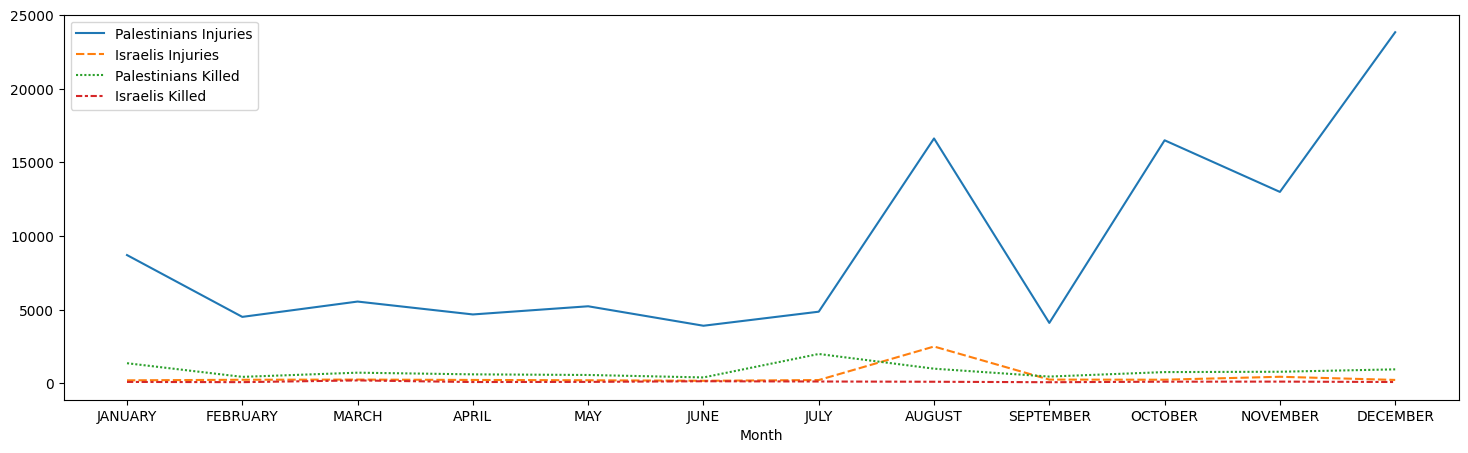

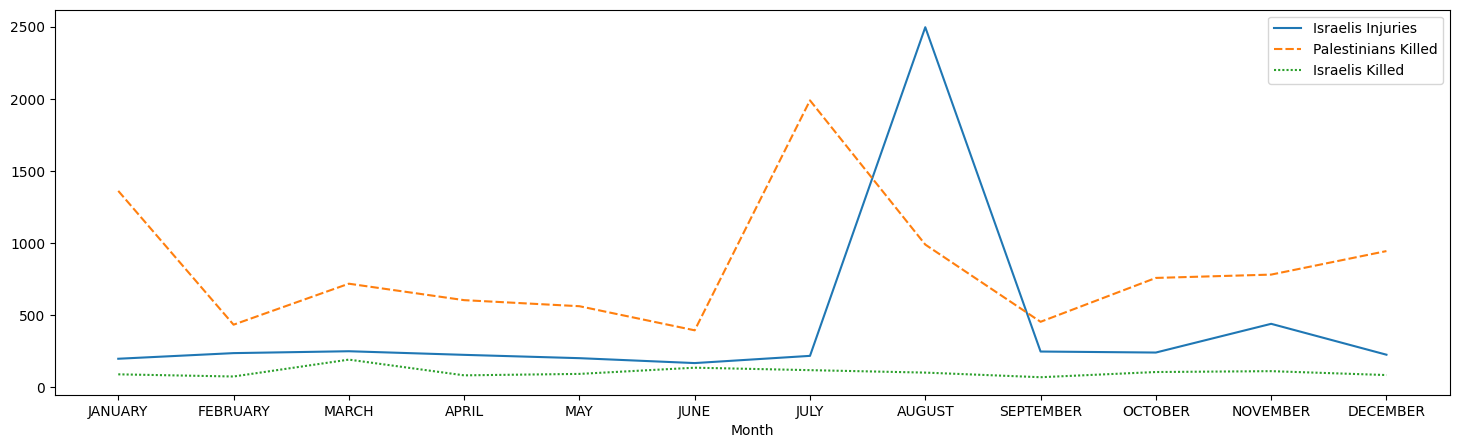

In [ ]:
plt.figure(figsize=(18,5))
sns.lineplot(data=month_group_df[num_col])
plt.xticks(list(month_group_df.index))
plt.figure(figsize=(18,5))
sns.lineplot(data=month_group_df[[col for col in num_col if col !='Palestinians Injuries']])
plt.xticks(list(month_group_df.index))
plt.show()

In [ ]:
ym_group_df=df.groupby(["Year","Month"]).agg({"Palestinians Injuries":"sum","Israelis Injuries":"sum","Palestinians Killed":"sum","Israelis Killed":"sum"}).reset_index()
ym_group_df.head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000,DECEMBER,781.0,0.0,51,8
1,2000,NOVEMBER,3838.0,0.0,112,22
2,2000,OCTOBER,5984.0,0.0,104,10
3,2000,SEPTEMBER,0.0,0.0,16,1
4,2001,APRIL,715.0,0.0,23,7


In [ ]:
year_wm=list()
for year in year_list:
  filter=ym_group_df[(ym_group_df["Year"]==year) & ((ym_group_df["Month"]=="MAY & JUNE"))]
  if len(filter)!=0:
    year_wm.append(year)
print(year_wm)



[2017]


In [ ]:
for year in year_list:
  filter=ym_group_df[(ym_group_df["Year"]==year) & ((ym_group_df["Month"]=="MAY & JUNE"))]
  if len(filter)!=0:
    display(filter)


,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
204,2017,MAY & JUNE,0.0,0.0,6,0


In [ ]:
!pip install nltk

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
file_path = "speech.txt"
with open(file_path, "r", encoding='utf-8') as file:
    speech_text = file.read()
print(file_path)
print(speech_text)

speech.txt
“I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government”

“Many key legislations did not get the discussion they deserved as the opposition put politics above them”

“This time period of the 21st century will impact the country for the next thousand years. We all should have a single focus”

“We have given the youth of India a government free of scams”

“Today a trust has arisen in the heart of the poor to fulfill his dreams”

“Opposition is not able to see the trust of people as they are so steeped in distrust”

“In 2028, when you will bring a No Confidence Motion, the Country will be among the top 3”

“Opposition believes in changing names but they can’t change their work culture”

“Freedom fighters and founding fathers of the country always opposed dynasty politics”

“Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the guilty ar

In [ ]:
speech_text_cleaned233 = re.sub(r'[^a-zA-Z0-9]',' ', speech_text)
speech_text_cleaned233

' I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government    Many key legislations did not get the discussion they deserved as the opposition put politics above them    This time period of the 21st century will impact the country for the next thousand years  We all should have a single focus    We have given the youth of India a government free of scams    Today a trust has arisen in the heart of the poor to fulfill his dreams    Opposition is not able to see the trust of people as they are so steeped in distrust    In 2028  when you will bring a No Confidence Motion  the Country will be among the top 3    Opposition believes in changing names but they can t change their work culture    Freedom fighters and founding fathers of the country always opposed dynasty politics    Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the guilty are punished

In [ ]:
speech_text_cleaned = re.sub(r'[^\w\s]','', speech_text)
speech_text_cleaned = speech_text_cleaned.lower()
words = word_tokenize(speech_text_cleaned)
stop_words = set(stopwords.words('english'))
word_filtered = [word for word in words if word not in stop_words]
print(words)
print("****************************")
print(stop_words)
print("****************************")
print(word_filtered)

['i', 'have', 'come', 'to', 'express', 'immense', 'gratitude', 'towards', 'each', 'and', 'every', 'citizen', 'of', 'india', 'for', 'repeatedly', 'showing', 'their', 'trust', 'in', 'the', 'government', 'many', 'key', 'legislations', 'did', 'not', 'get', 'the', 'discussion', 'they', 'deserved', 'as', 'the', 'opposition', 'put', 'politics', 'above', 'them', 'this', 'time', 'period', 'of', 'the', '21st', 'century', 'will', 'impact', 'the', 'country', 'for', 'the', 'next', 'thousand', 'years', 'we', 'all', 'should', 'have', 'a', 'single', 'focus', 'we', 'have', 'given', 'the', 'youth', 'of', 'india', 'a', 'government', 'free', 'of', 'scams', 'today', 'a', 'trust', 'has', 'arisen', 'in', 'the', 'heart', 'of', 'the', 'poor', 'to', 'fulfill', 'his', 'dreams', 'opposition', 'is', 'not', 'able', 'to', 'see', 'the', 'trust', 'of', 'people', 'as', 'they', 'are', 'so', 'steeped', 'in', 'distrust', 'in', '2028', 'when', 'you', 'will', 'bring', 'a', 'no', 'confidence', 'motion', 'the', 'country', 'wi

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in word_filtered]
print(words_lemmatized)

['come', 'express', 'immense', 'gratitude', 'towards', 'every', 'citizen', 'india', 'repeatedly', 'showing', 'trust', 'government', 'many', 'key', 'legislation', 'get', 'discussion', 'deserved', 'opposition', 'put', 'politics', 'time', 'period', '21st', 'century', 'impact', 'country', 'next', 'thousand', 'year', 'single', 'focus', 'given', 'youth', 'india', 'government', 'free', 'scam', 'today', 'trust', 'arisen', 'heart', 'poor', 'fulfill', 'dream', 'opposition', 'able', 'see', 'trust', 'people', 'steeped', 'distrust', '2028', 'bring', 'confidence', 'motion', 'country', 'among', 'top', '3', 'opposition', 'belief', 'changing', 'name', 'cant', 'change', 'work', 'culture', 'freedom', 'fighter', 'founding', 'father', 'country', 'always', 'opposed', 'dynasty', 'politics', 'crime', 'woman', 'unacceptable', 'central', 'government', 'state', 'government', 'work', 'ensure', 'guilty', 'punished', 'peace', 'manipur', 'march', 'path', 'development', 'assure', 'people', 'manipur', 'mother', 'daugh

In [ ]:
sia = SentimentIntensityAnalyzer()
print(sia.polarity_scores('gratitude'))
print(sia.polarity_scores('hate'))
print(sia.polarity_scores('richness'))

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4939}


In [ ]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)['compound'] for word in words_lemmatized]
average_sentiment = sum(sentiment_scores)/len(sentiment_scores)
print(sentiment_scores)
sum(sentiment_scores),len(sentiment_scores),average_sentiment,

[0.0, 0.0, 0.0, 0.5106, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5106, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5106, -0.5719, 0.0, 0.5106, 0.0, 0.0, -0.4767, 0.4404, 0.25, 0.0, 0.0, 0.0, 0.5106, 0.0, 0.0, -0.4215, 0.0, 0.0, 0.5106, 0.0, 0.0, 0.0, 0.2023, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6369, 0.1531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5423, 0.0, -0.4588, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3818, -0.4215, -0.4588, 0.5423, 0.0, 0.0, 0.0, 0.0, 0.34, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0516, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4215, 0.3818, 0.0, 0.0, 0.4019, 0.0, 0.5106, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.296, 0.0, 0.0, 0.0, 0.0, -0.296, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5106, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5106, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5106, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

(22.906000000000002, 1602, 0.014298377028714108)

In [ ]:
positive_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(word_filtered) if sentiment_scores[i] >= -0.1 and sentiment_scores[i] <= 0.1]

In [ ]:
#positive_words = list(set(positive_words))
#positive_words

In [ ]:
print("The positive words are :", positive_words)

The positive words are : ['gratitude', 'trust', 'free', 'trust', 'fulfill', 'dreams', 'trust', 'confidence', 'top', 'freedom', 'fighters', 'ensure', 'peace', 'assure', 'faith', 'commitment', 'party', 'revered', 'confidence', 'gratitude', 'trust', 'confidence', 'strength', 'lucky', 'confidence', 'blessings', 'better', 'important', 'interest', 'party', 'free', 'energy', 'determination', 'huge', 'dreams', 'strengths', 'dreams', 'free', 'courage', 'opportunity', 'confidence', 'confidence', 'growth', 'trust', 'fulfill', 'dreams', 'marvel', 'helping', 'save', 'helping', 'save', 'helping', 'save', 'trust', 'like', 'wish', 'well', 'best', 'profit', 'increased', 'success', 'growing', 'stronger', 'responsible', 'vision', 'top', 'definite', 'confidence', 'top', 'faith', 'like', 'agree', 'peace', 'trusting', 'trust', 'certain', 'opportunity', 'trust', 'trust', 'confidence', 'help', 'parties', 'faith', 'dwelled', 'fascination', 'freedom', 'fighters', 'dedicated', 'party', 'freebies', 'winning', 'as

In [ ]:
print("The negative words are :", negative_words)

The negative words are : ['scams', 'poor', 'distrust', 'crimes', 'unacceptable', 'guilty', 'punished', 'pressure', 'stop', 'poor', 'deprived', 'betrayal', 'disappointed', 'scams', 'stressed', 'unsuccessful', 'poor', 'poverty', 'poverty', 'poor', 'poor', 'criticizing', 'distrust', 'bad', 'bad', 'criticism', 'bad', 'misinformation', 'confuse', 'scam', 'crisis', 'severely', 'attacked', 'ills', 'questioned', 'lack', 'poverty', 'hard', 'distrusting', 'lack', 'strike', 'enemy', 'ill', 'misinformed', 'insecurity', 'misinformed', 'low', 'fool', 'arrogance', 'arrogant', 'contradictions', 'damages', 'suffered', 'victims', 'perturbed', 'stuck', 'warned', 'havoc', 'lamented', 'reckless', 'pressure', 'violence', 'saddening', 'crimes', 'unacceptable', 'guilty', 'punished', 'protest', 'failure', 'attack', 'neglect', 'conflict', 'forbidden', 'forbidden', 'loss', 'lack', 'pressure', 'stop', 'worse', 'petty', 'pain', 'suffering']


In [ ]:
print("The neutral words are :", neutral_words)

The neutral words are : ['come', 'express', 'immense', 'towards', 'every', 'citizen', 'india', 'repeatedly', 'showing', 'government', 'many', 'key', 'legislations', 'get', 'discussion', 'deserved', 'opposition', 'put', 'politics', 'time', 'period', '21st', 'century', 'impact', 'country', 'next', 'thousand', 'years', 'single', 'focus', 'given', 'youth', 'india', 'government', 'today', 'arisen', 'heart', 'opposition', 'able', 'see', 'people', 'steeped', '2028', 'bring', 'motion', 'country', 'among', '3', 'opposition', 'believes', 'changing', 'names', 'cant', 'change', 'work', 'culture', 'founding', 'fathers', 'country', 'always', 'opposed', 'dynasty', 'politics', 'women', 'central', 'government', 'state', 'government', 'work', 'manipur', 'march', 'path', 'development', 'people', 'manipur', 'mothers', 'daughters', 'manipur', 'nation', 'stands', 'house', 'stands', 'government', 'leave', 'stone', 'unturned', 'manipur', 'gets', 'back', 'track', 'development', 'government', 'given', 'first', 

# Visualization

In [ ]:
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)
print(word_freq_positive)
print(word_freq_negative)
print(word_freq_neutral)

<FreqDist with 74 samples and 138 outcomes>
<FreqDist with 61 samples and 82 outcomes>
<FreqDist with 658 samples and 1382 outcomes>


<Axes: title={'center': 'Top 20 Positive Sentiment Words'}, xlabel='Samples', ylabel='Counts'>

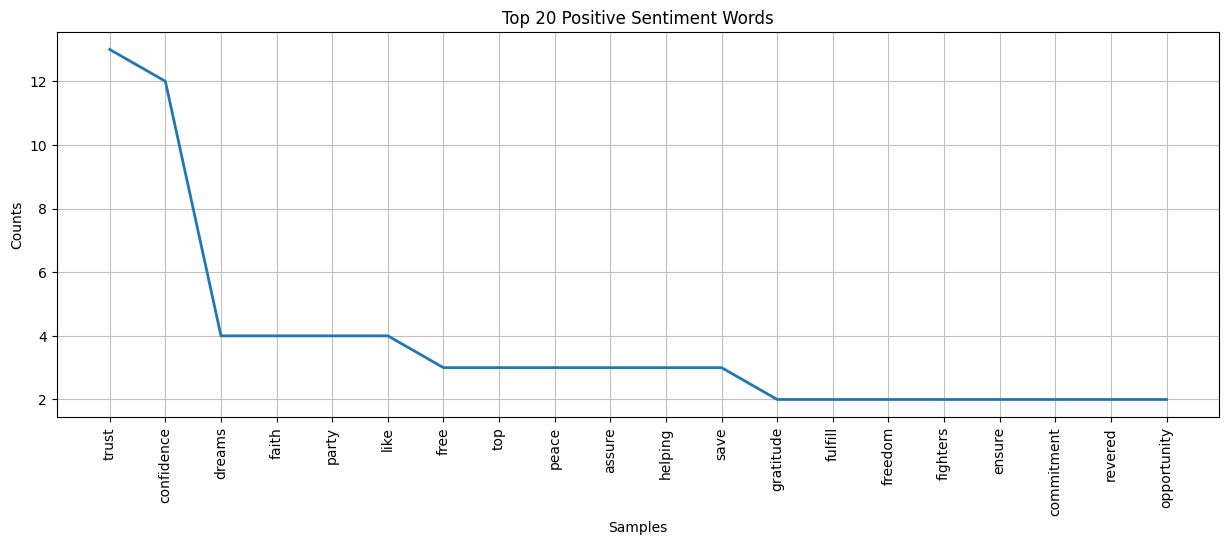

In [ ]:
plt.figure(figsize=(15,5))
word_freq_positive.plot(20, title="Top 20 Positive Sentiment Words")

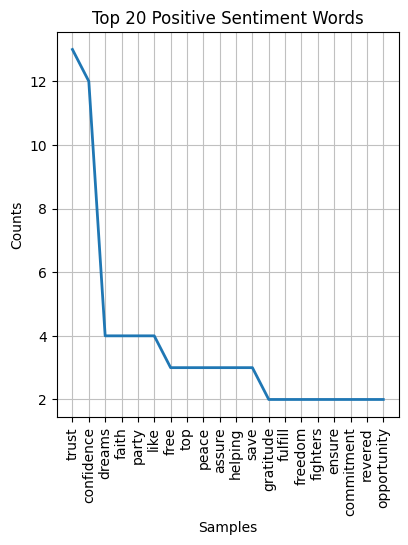

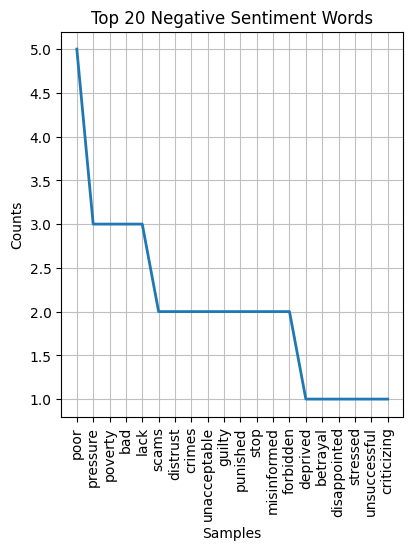

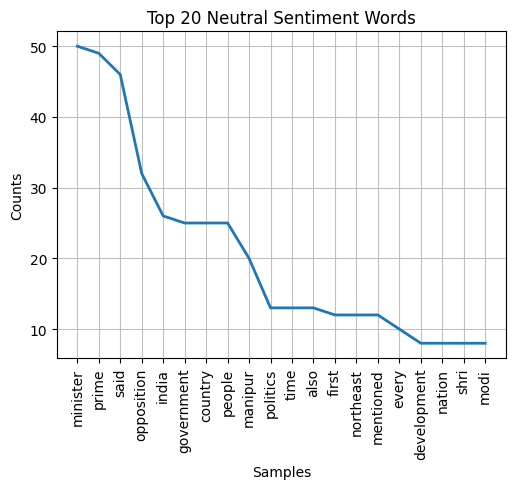

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
word_freq_positive.plot(20, title="Top 20 Positive Sentiment Words")

plt.figure(figsize=(15,5))
plt.subplot(132)
word_freq_negative.plot(20, title="Top 20 Negative Sentiment Words")

plt.figure(figsize=(15,5))
plt.subplot(133)
word_freq_neutral.plot(20, title="Top 20 Neutral Sentiment Words")

plt.tight_layout()
plt.show()

In [ ]:
df_positive = pd.DataFrame(word_freq_positive.most_common(20), columns=['Word', 'Frequency'])
df_negative = pd.DataFrame(word_freq_negative.most_common(20), columns=['Word', 'Frequency'])
df_neutral = pd.DataFrame(word_freq_neutral.most_common(20), columns=['Word', 'Frequency'])
print(df_positive)
print("***************"*5)
print(df_negative)
print("***************"*5)
print(df_neutral)
print("***************"*5)

           Word  Frequency
0         trust         13
1    confidence         12
2        dreams          4
3         faith          4
4         party          4
5          like          4
6          free          3
7           top          3
8         peace          3
9        assure          3
10      helping          3
11         save          3
12    gratitude          2
13      fulfill          2
14      freedom          2
15     fighters          2
16       ensure          2
17   commitment          2
18      revered          2
19  opportunity          2
***************************************************************************
            Word  Frequency
0           poor          5
1       pressure          3
2        poverty          3
3            bad          3
4           lack          3
5          scams          2
6       distrust          2
7         crimes          2
8   unacceptable          2
9         guilty          2
10      punished          2
11          stop     

In [ ]:
fig_positive = px.bar(df_positive, x ='Word', y='Frequency', title='Top 20 Positive Sentiment Words')
fig_negative = px.bar(df_negative, x ='Word', y='Frequency', title='Top 20 Negative Sentiment Words')
fig_neutral = px.bar(df_neutral, x ='Word', y='Frequency', title='Top 20 Neutral Sentiment Words')

fig_positive.show()
print()
fig_negative.show()
print()
fig_neutral.show()

In [ ]:
wordcloud_positve = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_positive)
wordcloud_negative = WordCloud(width=800, height=400, background_color='blue').generate_from_frequencies(word_freq_negative)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_neutral)

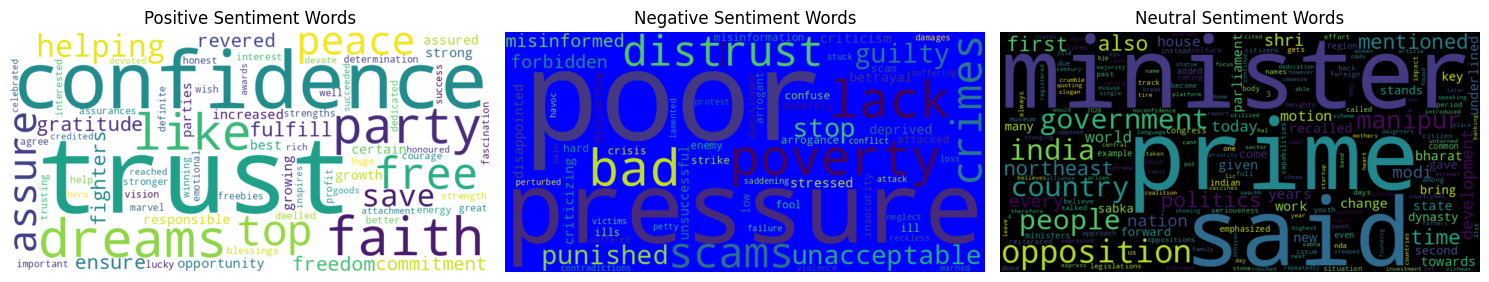

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(wordcloud_positve, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Words")

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Words")

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title("Neutral Sentiment Words")

plt.tight_layout()
plt.show()

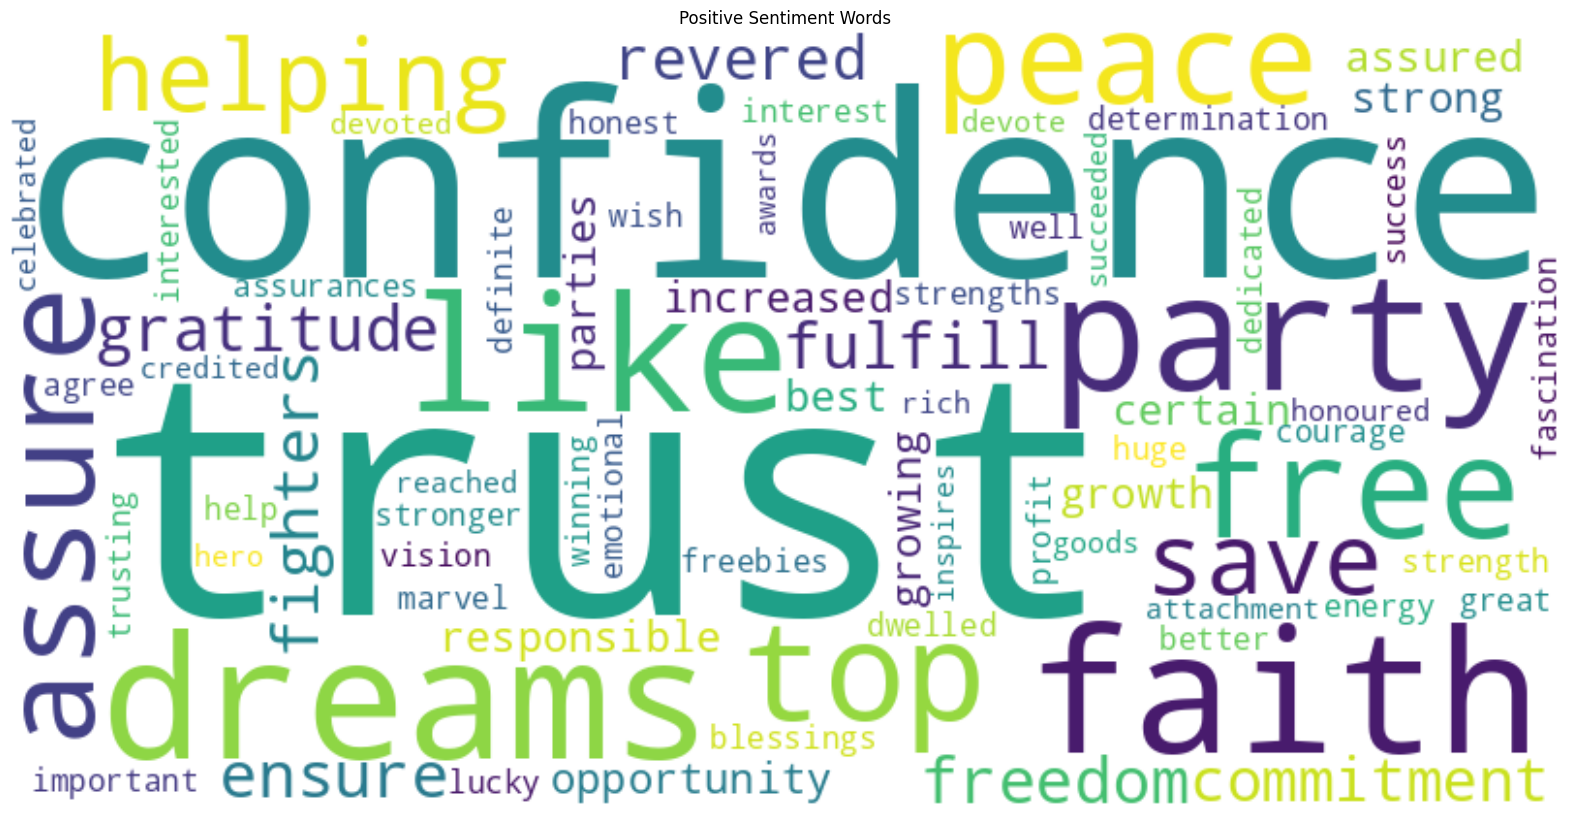

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud_positve, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Words")
plt.show()

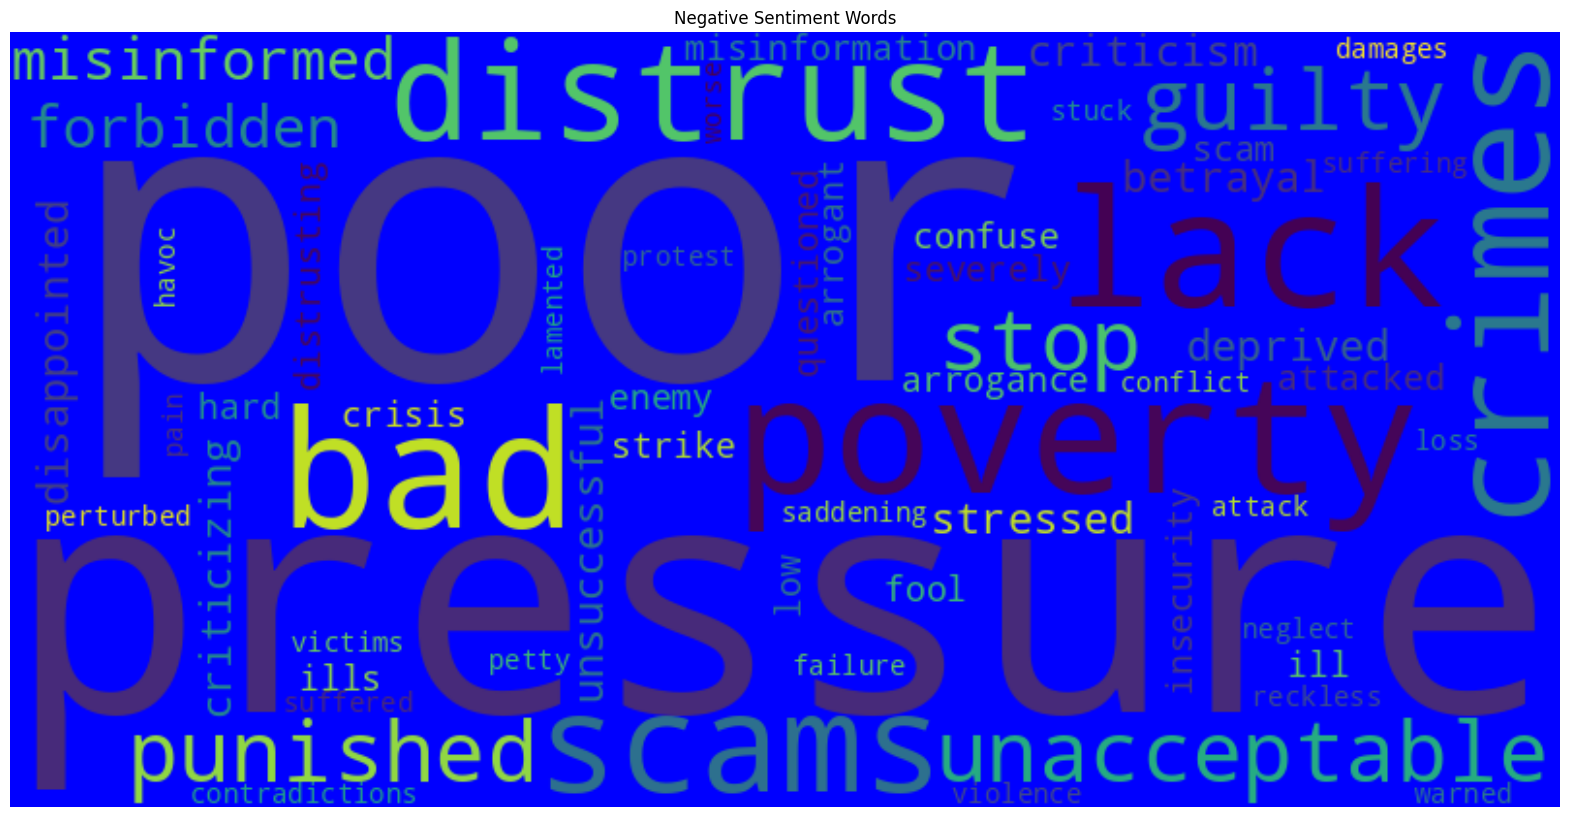

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Words")
plt.show()

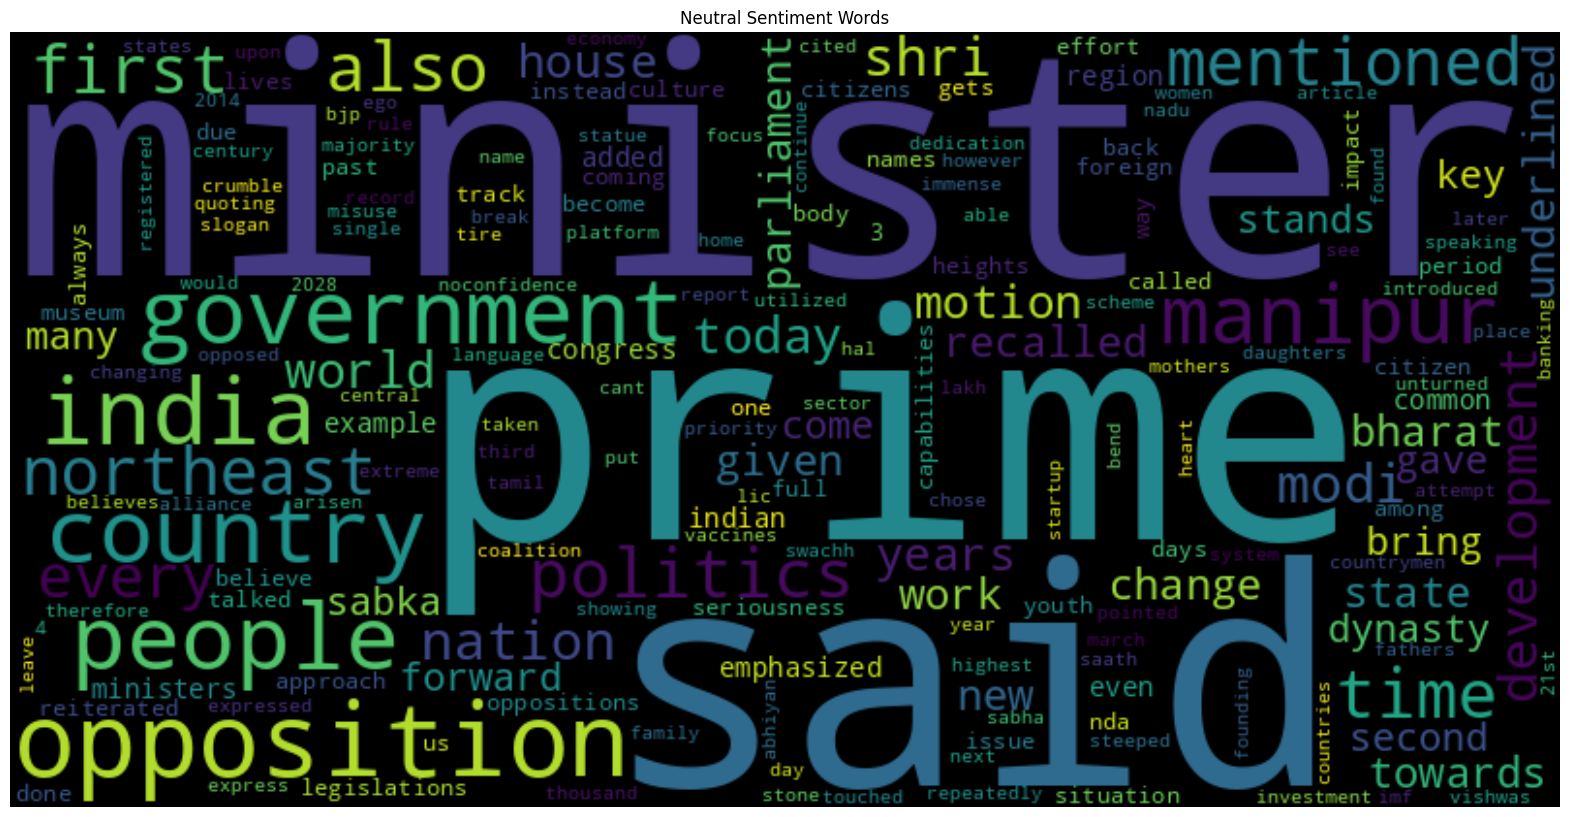

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title("Neutral Sentiment Words")
plt.show()